# Textual Inversion

[Textual Inversion](https://arxiv.org/abs/2208.01618) is a technique for capturing novel concepts from a small number of example images. While the technique was originally demonstrated with a [latent diffusion model](https://github.com/CompVis/latent-diffusion), it has since been applied to other model variants like Stable Diffusion. The learned concepts can be used to better control the images generated from text-to-image pipelines. It learns new “words” in the text encoder’s embedding space, which are used within text prompts for personalized image generation.

# 1. Problem Definition
Your task is to survey papers about "Textual inversion for diffusion models" and build a demo using the technique you studied.

# 2. Delivery Output

We expect you to show a complete application that can draw a picture of yourself riding a unicorn in a corn field.

# 3. Solution

- Training new `object` with the placeholder token `quyanh-person` and initializer token `person`
- Pre-trained model `stabilityai/stable-diffusion-2`
- Dataset: personal images

See detail on my github [QuyAnh2005](https://github.com/QuyAnh2005/textual-inversion/tree/main)

In [2]:
!pip install -qq diffusers==0.16.1 transformers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.0 MB/s eta 0:00:00


In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
# Import required libraries
import os
import torch

import PIL
from PIL import Image

from diffusers import StableDiffusionPipeline
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [5]:
# Specify the pre-trained model
pretrained_model_name_or_path = "stabilityai/stable-diffusion-2"

# Specify the pre-trained concept
repo_id_embeds = "sd-concepts-library/quyanh-person-v2"

In [7]:
# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path,
    torch_dtype=torch.float16
).to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [9]:
# Load the concept into pipeline
pipe.load_textual_inversion(repo_id_embeds)

In [16]:
# Function for inference
def show(prompt, num_samples=2, num_rows=2):
    all_images = []
    for _ in range(num_rows):
        images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
        all_images.extend(images)

    grid = image_grid(all_images, num_samples, num_rows)
    return grid

Run the Stable Diffusion pipeline. Don't forget to use the placeholder token in your prompt - `<quyanh-person>` is the placeholder token.

  0%|          | 0/50 [00:00<?, ?it/s]

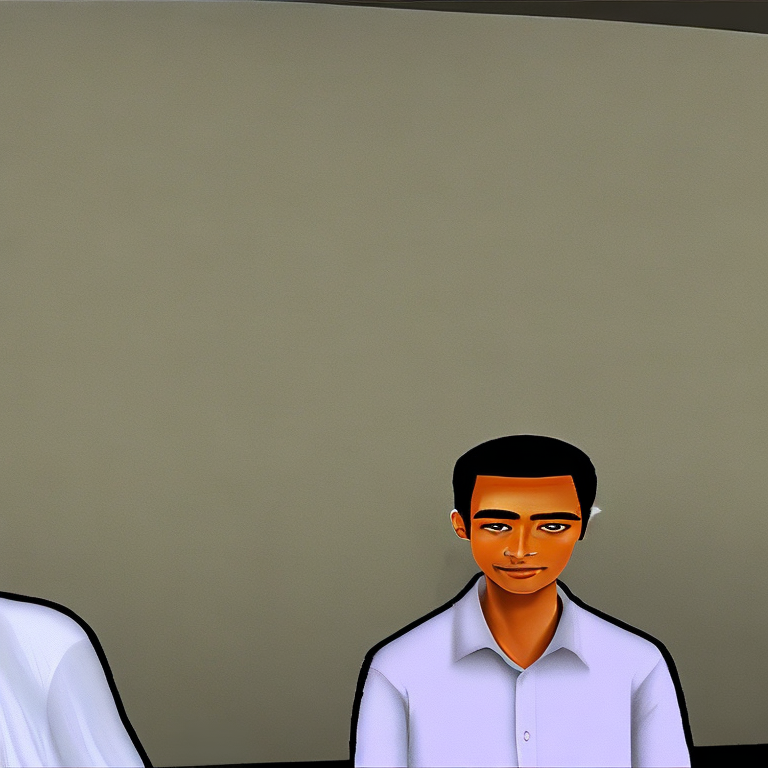

In [20]:
prompt = "a portrait painting of <quyanh-person>"
show(prompt, num_samples=1, num_rows=1)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

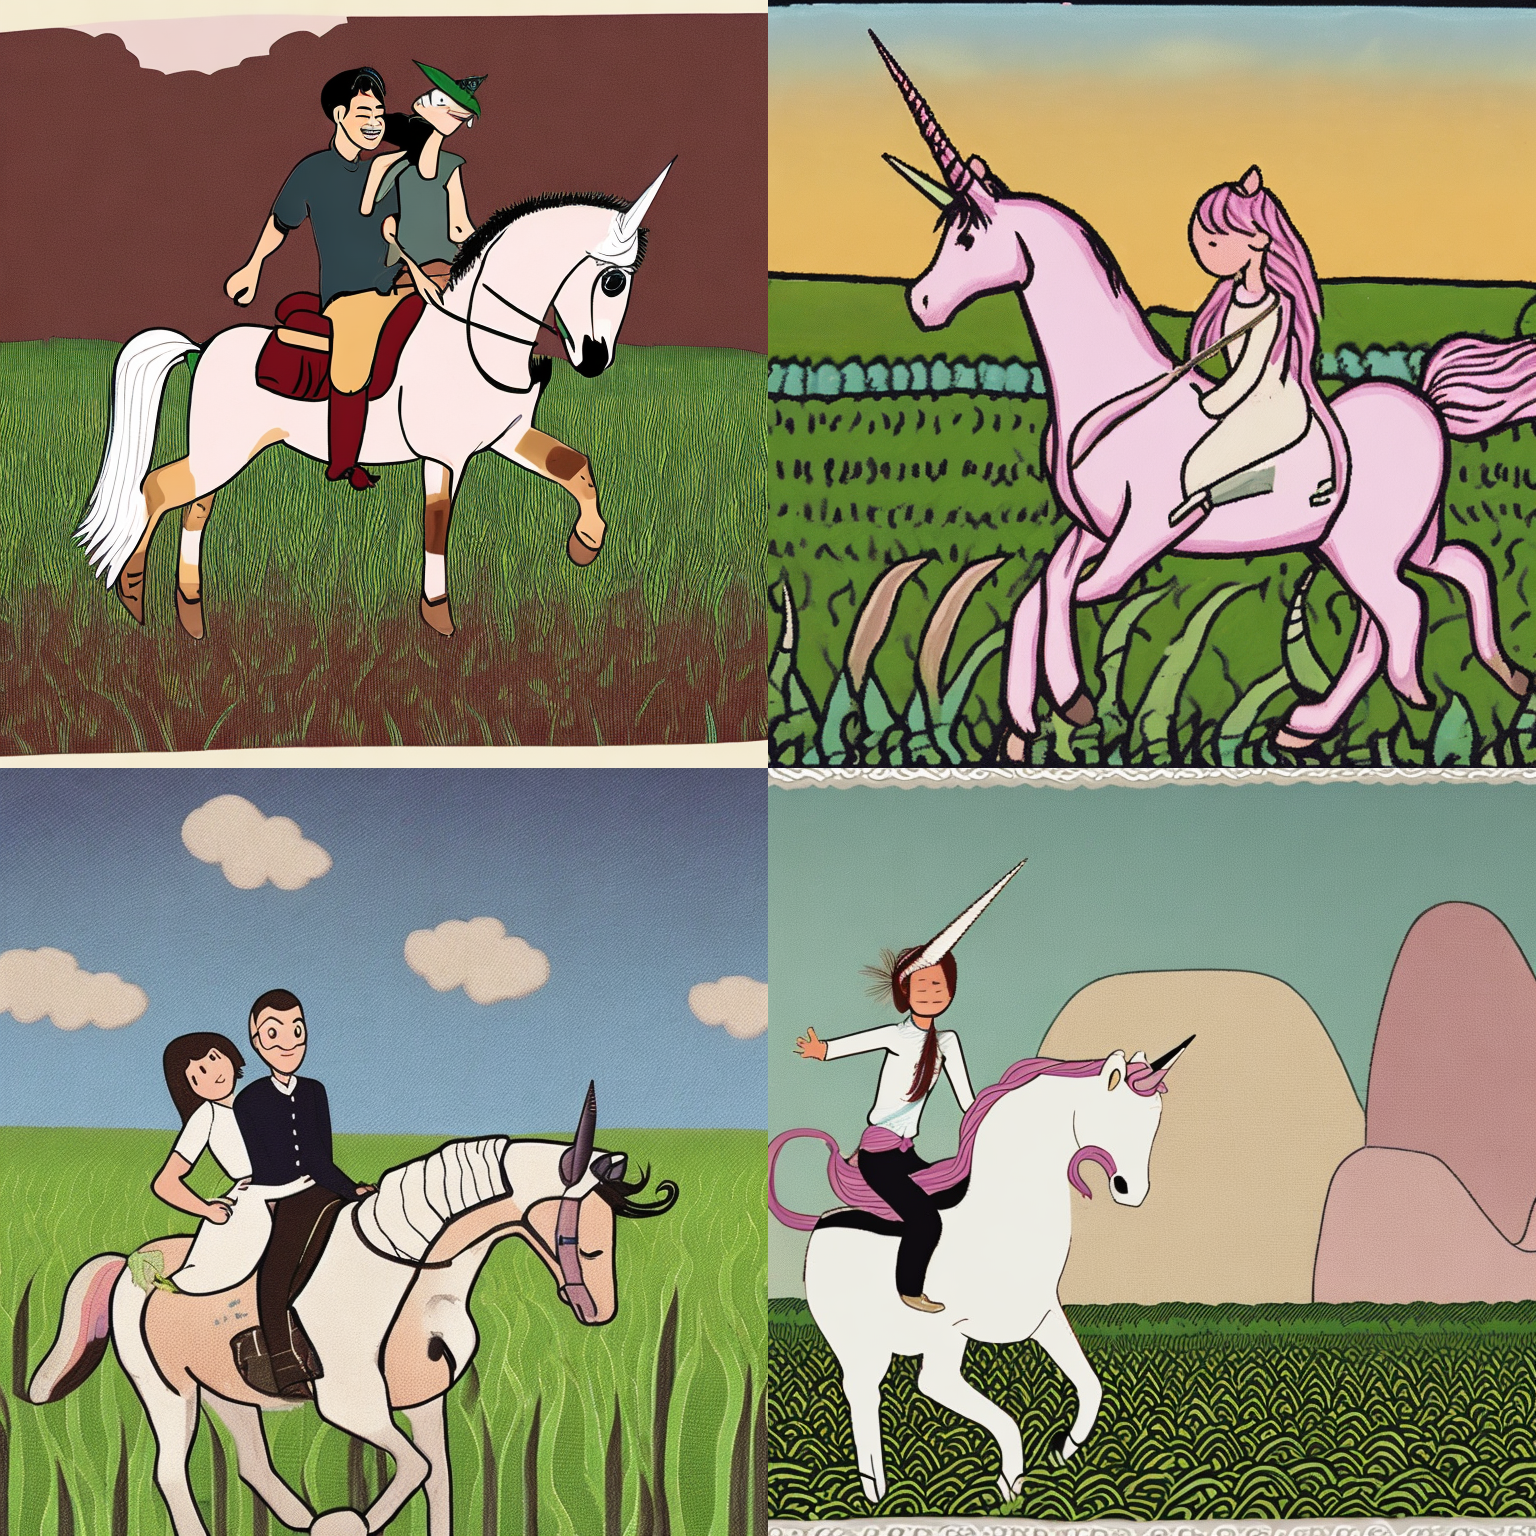

In [23]:
prompt = "a picture of <quyanh-person> riding a unicorn in a corn field"
show(prompt)

# Comment
- Model via Textual Inversion still suffer from biases
- Other methods to personalize text2image models like stable diffusion given just a few(3~5) images of a subject. Such as:
    - [DreamBooth](https://arxiv.org/abs/2208.12242)
    - [HyperDreamBooth](https://arxiv.org/abs/2307.06949)